In [140]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [141]:
#Read input file and understand the data
# "default" is my dependent variable

In [142]:
credit_data = pd.read_csv("german_credit.csv")
credit_data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


`The dataset tells about the credit history and other financial status of the customer, and also wether they defaulted in paying credit bills
The data here has 20 dimension.Since, default is the dependent variable.Separating that column to a different dataframe.`

In [143]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [144]:
# Print Shape of model data
credit_data.shape

(1000, 21)

In [145]:
dummy_data = pd.get_dummies(credit_data)
dummy_data.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

`We can find correalation matrix and use heatmap to visualize the correlation between the variables.`

In [146]:
Y = dummy_data['default']
X = dummy_data.iloc[:,1:62]
X.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1


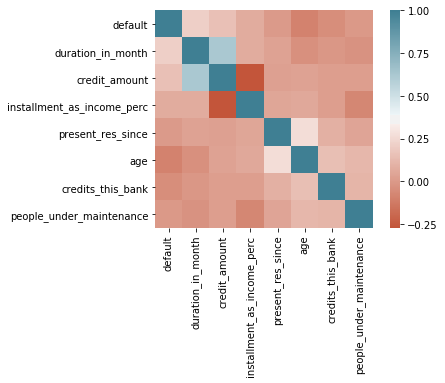

In [147]:
corr = credit_data.corr()
sns.heatmap(corr,cmap=sns.diverging_palette(20, 220, n=256),
    square=True)

`From the heatmap, we can see that credit_amount and duration_in_month are highly correlated features.
Also,present_res_since and age have high correlation.`

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.70,random_state=1)

### Q4 Build Random Forest Model( 2 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [149]:
from sklearn.ensemble import RandomForestClassifier
randomForest_clf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
randomForest_clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [150]:
Y_predicted = randomForest_clf.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [151]:
import sklearn.metrics as metrics
print("The accuracy score of the random forest model is:"+str(metrics.accuracy_score(Y_test,Y_predicted)))

The accuracy score of the random forest model is:0.7433333333333333


In [152]:
print("The confusion matrix of the random forest model is:")
print(str(metrics.confusion_matrix(Y_test,Y_predicted)))

The confusion matrix of the random forest model is:
[[197  17]
 [ 60  26]]


### Q6 Show the list of the features importance( 1 Marks)

In [153]:
randomForest_clf.feature_importances_

array([0.0720369 , 0.10011299, 0.03698526, 0.03336023, 0.07812153,
       0.01887908, 0.01134648, 0.01671098, 0.03092904, 0.00733814,
       0.0447593 , 0.00769965, 0.02938331, 0.00989199, 0.01463478,
       0.01253093, 0.00565399, 0.01148948, 0.01805625, 0.01189063,
       0.01544127, 0.00444066, 0.0015188 , 0.01262918, 0.002495  ,
       0.00095491, 0.00854398, 0.02014251, 0.00914877, 0.00585681,
       0.01370746, 0.01401708, 0.01406608, 0.0150978 , 0.01236615,
       0.00753987, 0.01564968, 0.00650298, 0.00716742, 0.01598798,
       0.00792537, 0.00874017, 0.01067193, 0.01268978, 0.01412935,
       0.01491938, 0.01014396, 0.01428347, 0.01744218, 0.00769151,
       0.00703641, 0.01458963, 0.01045272, 0.0115418 , 0.01510074,
       0.00197804, 0.01112365, 0.01424959, 0.0143988 , 0.00275009,
       0.00305608])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [154]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [155]:
# Use below values
num_folds = 10
seed = 77
kfold = KFold(n_splits=5,random_state=2)
kfold

KFold(n_splits=5, random_state=2, shuffle=False)

In [156]:
#Validate the Random Forest model build above using k fold

In [157]:
results = cross_val_score(randomForest_clf, X_train, Y_train, cv=kfold, scoring='recall')
results

array([0.325     , 0.53658537, 0.32      , 0.34285714, 0.375     ])

In [158]:
#Calculate Mean score

In [159]:
print("The mean score of the random forest model is:"+str(np.mean(results)))

The mean score of the random forest model is:0.3798885017421603


In [160]:
# Calculate score standard deviation using std()

In [161]:
print("The standard deviation of the random forest model is:"+str(np.std(results)))

The standard deviation of the random forest model is:0.08068271993054187


# Q8 Build Ada boosting model, check the accuracy, and print confusion matrix ( 1 Marks)

In [162]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier(random_state=0,
    n_estimators=200
)
ada_classifier.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=0)

In [164]:
Y_predict = ada_classifier.predict(X_test)

In [166]:
print("The accuracy score of the Ada Boosting Model is:"+str(metrics.accuracy_score(Y_test,Y_predict)))

The accuracy score of the Ada Boosting Model is:0.7333333333333333


In [167]:
print("The confusion matrix of the Ada Boosting model is:")
print(str(metrics.confusion_matrix(Y_test,Y_predict)))

The confusion matrix of the Ada Boosting model is:
[[184  30]
 [ 50  36]]


# Q9. Build Gradient boosting model, check the accuracy, and print confusion matrix ( 1 Marks)
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [172]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, Y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, Y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.694
Accuracy score (validation): 0.713

Learning rate:  0.075
Accuracy score (training): 0.696
Accuracy score (validation): 0.713

Learning rate:  0.1
Accuracy score (training): 0.703
Accuracy score (validation): 0.713

Learning rate:  0.25
Accuracy score (training): 0.746
Accuracy score (validation): 0.730

Learning rate:  0.5
Accuracy score (training): 0.793
Accuracy score (validation): 0.723

Learning rate:  0.75
Accuracy score (training): 0.797
Accuracy score (validation): 0.723

Learning rate:  1
Accuracy score (training): 0.806
Accuracy score (validation): 0.720



`We're mainly interested in the classifier's accuracy on the validation set, but it looks like
a learning rate of 0.25 gives us the best performance on the validation set and good performance on the training set.`

In [174]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, Y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test, predictions))

Confusion Matrix:
[[207   7]
 [ 74  12]]


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [175]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [179]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, Y_train)
    randomForest_clf.fit(X_, y_)
    y_pred = randomForest_clf.predict(X_test)
    
    acc = accuracy_score(y_pred, Y_test)
    accuracy.append(acc)

In [180]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7553333333333334
Standard deviation:  0.00702376916856849
